#### -Optimizing the social ad campaigns for the highest conversion rate possible. (Attain best Reach to Conversion ratios/Click to Conversion ratios)

#### -Finding the perfect target demographics with the appropriate clickthrough rates.

#### -Understanding the ideal turnaround/decision making time per age group to convert and retarget future social campaigns.

#### -Comparing the individual campaign performance so the best creative/campaign can be run again with adjusted audiences



Content

The data used in this project is from an anonymous organisation’s social media ad campaign. The file conversion_data.csv contains 1143 observations in 11 variables. Below are the descriptions of the variables:

1.) ad_id: an unique ID for each ad.

2.) xyzcampaignid: an ID associated with each ad campaign of XYZ company.

3.) fbcampaignid: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whim the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.

# 1. The objective is to maximize the conversion rate of social ad campaigns by optimizing Reach to Conversion ratios and Click to Conversion ratios.

In [228]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#import data

A = pd.read_csv(r"C:\Users\KAH\Downloads\KAG_conversion_data.csv")
A

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


In [155]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [156]:
A.describe()


,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [229]:
# Checking for any null values

A.isnull().sum()


ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [159]:
print("Number of Companies for campaign : ",len(A['xyz_campaign_id'].unique()))
print("Male to Female ratio : ", len(A[A['gender']=='M'])/len(A[A['gender']=='F']))

Number of Companies for campaign :  3
Male to Female ratio :  1.074410163339383


In [160]:
# Clicks to Impression ratio

A['clickToImpPer']=(A['Clicks']/A['Impressions'])*100
A

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,clickToImpPer
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.013605
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.011198
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.023480
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.024195
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.022305
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.018822
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.018478
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2,0.017083


In [162]:
A['age'].value_counts()

age
30-34    426
45-49    259
35-39    248
40-44    210
Name: count, dtype: int64

# 1. The objective is to maximize the conversion rate of social ad campaigns by optimizing Reach to Conversion ratios and Click to Conversion ratios.

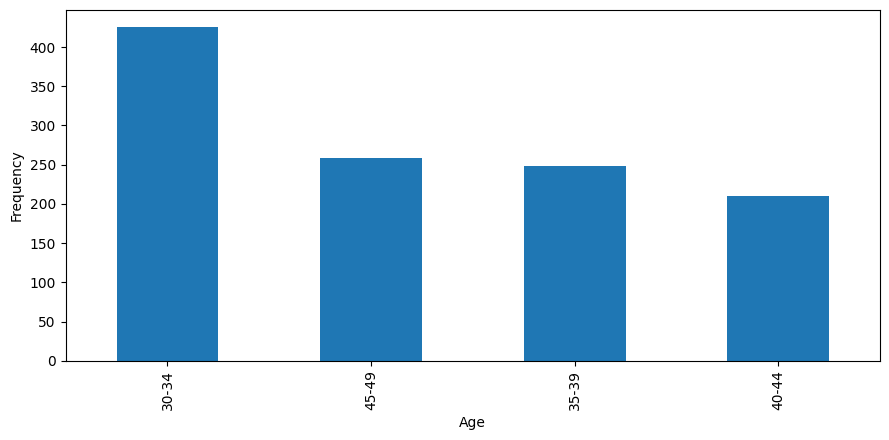

In [223]:
# Plot for frequency of people in each age group

plt.rcParams["figure.figsize"] = [9, 4.5]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
A['age'].value_counts().plot(ax=ax, kind='bar', xlabel='Age', ylabel='Frequency')
plt.show()


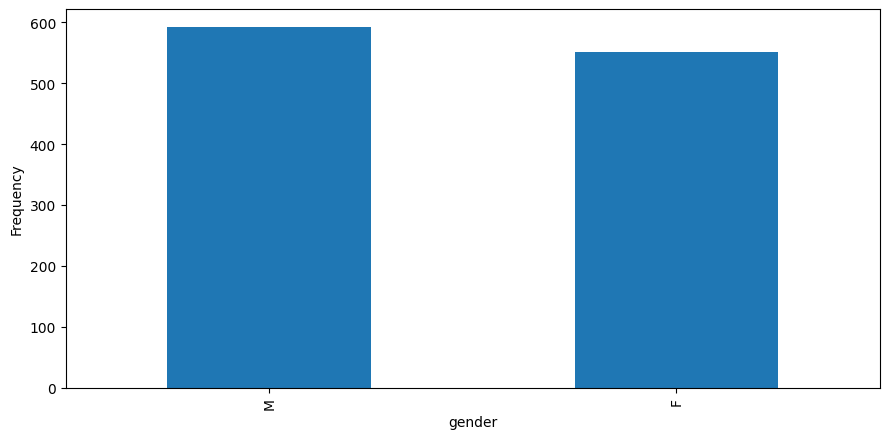

In [163]:
# Plot for frequency of people by gender

plt.rcParams["figure.figsize"] = [9, 4.5]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
A['gender'].value_counts().plot(ax=ax, kind='bar', xlabel='gender', ylabel='Frequency')
plt.show()


In [165]:
# Grouping the data based on Age and Gender

B = A.groupby(['age','gender'],as_index=False)[['interest','Impressions','Spent','Total_Conversion','Clicks']].mean()
B['clickToImpPer']=B['Clicks']/B['Impressions']

B

,age,gender,interest,Impressions,Spent,Total_Conversion,Clicks,clickToImpPer
0,30-34,F,31.878173,160261.807107,38.636954,3.142132,25.883249,0.000162
1,30-34,M,29.912664,159045.602620,33.366463,3.545852,19.144105,0.000120
2,35-39,F,36.431193,196692.706422,55.608716,2.788991,38.174312,0.000194
3,35-39,M,31.863309,148670.064748,36.338705,2.316547,21.100719,0.000142
4,40-44,F,36.000000,218655.841121,69.126916,3.009346,48.383178,0.000221
5,40-44,M,32.796117,157360.504854,40.710194,1.951456,24.844660,0.000158
6,45-49,F,33.898551,278663.702899,97.342101,2.891304,68.413043,0.000246
7,45-49,M,33.173554,208903.033058,60.474876,2.355372,36.454545,0.000175


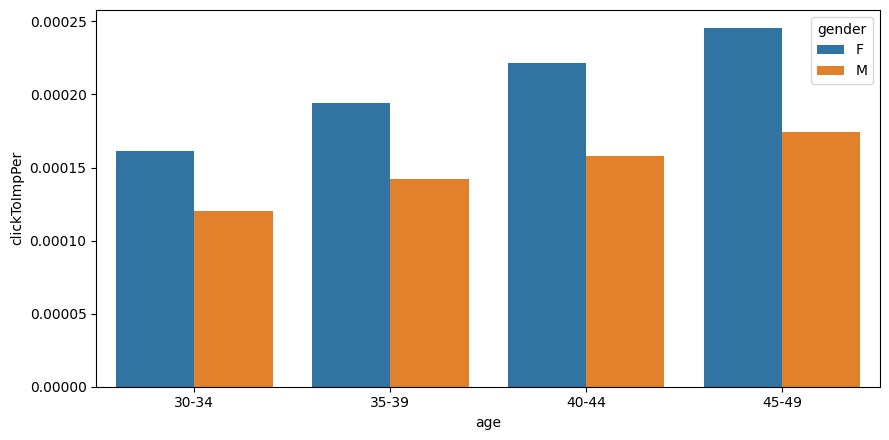

In [166]:
# Plot for Click to Impression vs Age

sns.barplot(x=B.age,y=B.clickToImpPer,hue=B.gender)
plt.show()


### In the age group 45-49 and across all age groups, females have a higher Click to Impression ratio compared to males.






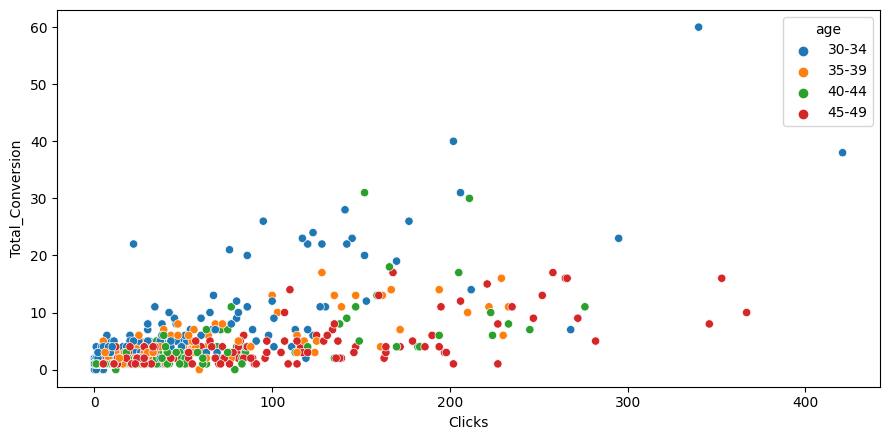

In [167]:
# Scatterplot showing Total Conversions vs Clicks for each age group

sns.scatterplot(x = A['Clicks'], y = A['Total_Conversion'], hue=A["age"])
plt.show()


In [168]:
# Overall Stats for each age group

A.groupby(['age'],as_index=False)[['interest','Impressions','Spent','Total_Conversion','Clicks']].mean()

,age,interest,Impressions,Spent,Total_Conversion,Clicks
0,30-34,30.821596,159608.025822,35.803756,3.359155,22.260563
1,35-39,33.870968,169776.790323,44.808185,2.524194,28.604839
2,40-44,34.428571,188591.938095,55.189190,2.490476,36.838095
3,45-49,33.559846,246072.810811,80.118417,2.640927,53.482625


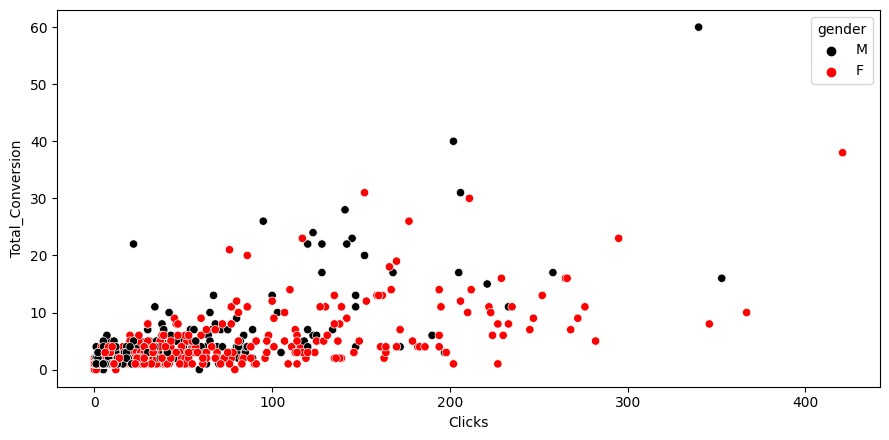

In [169]:
# Plot Total Conversions vs Clicks for each gender 

sns.scatterplot(x = A['Clicks'], y = A['Total_Conversion'], hue=A["gender"], palette = ['black','red'])
plt.show()

In [170]:
# Overall Stats for each gender

A.groupby(['gender'],as_index=False)[['interest','Impressions','Spent','Total_Conversion','Clicks']].mean()


,gender,interest,Impressions,Spent,Total_Conversion,Clicks
0,F,34.085299,208462.517241,62.618185,2.983666,43.335753
1,M,31.538851,166506.724662,40.882787,2.736486,24.133446




## Male users exhibit a higher Total Conversion per Clicks ratio.




In [171]:
A

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,clickToImpPer
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.013605
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.011198
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.023480
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.024195
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.022305
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.018822
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.018478
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2,0.017083


In [177]:
C=A.groupby("fb_campaign_id")[["interest","Impressions","Spent","Total_Conversion","Clicks"]].mean()
C

,interest,Impressions,Spent,Total_Conversion,Clicks
fb_campaign_id,,,,,
103916,15.0,7350.0,1.430000,2.0,1.0
103917,16.0,17861.0,1.820000,2.0,2.0
103920,20.0,693.0,0.000000,1.0,0.0
103928,28.0,4196.0,1.270000,1.0,1.0
103929,29.0,1915.0,0.000000,1.0,0.0
...,...,...,...,...,...
179977,109.0,1129773.0,358.189997,13.0,252.0
179978,110.0,637549.0,173.880003,3.0,120.0
179979,111.0,151531.0,40.289999,2.0,28.0


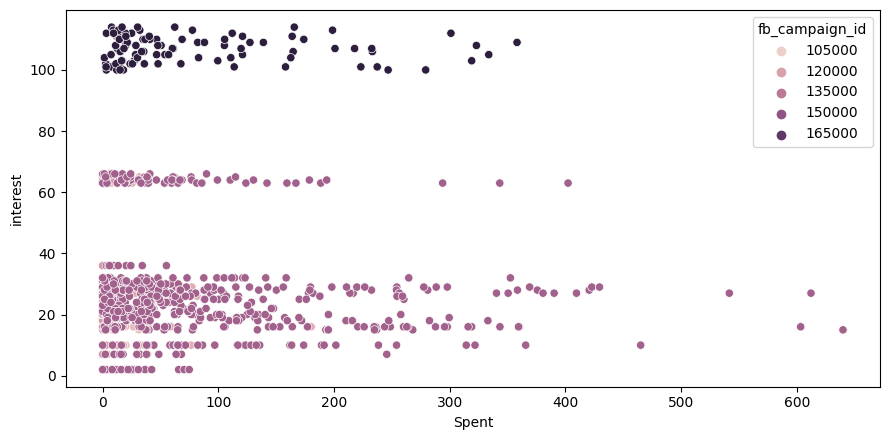

In [173]:
# Plot Total Conversions vs Clicks for each gender 

sns.scatterplot(x = A['Spent'], y = A['interest'], hue=A["fb_campaign_id"])
plt.show()

In [174]:
A

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,clickToImpPer
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.013605
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.011198
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.023480
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.024195
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.022305
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.018822
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.018478
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2,0.017083


In [175]:
# Clicks to Impression ratio

A['clickToImpPer']=(A['Clicks']/A['Impressions'])*100
A

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,clickToImpPer
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.013605
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.011198
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.023480
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.024195
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.022305
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.018822
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.018478
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2,0.017083


# 2. Identifying the optimal target demographics based on their clickthrough rates (Clickthrough rate: ClickToImpPer = Clicks/Impression).




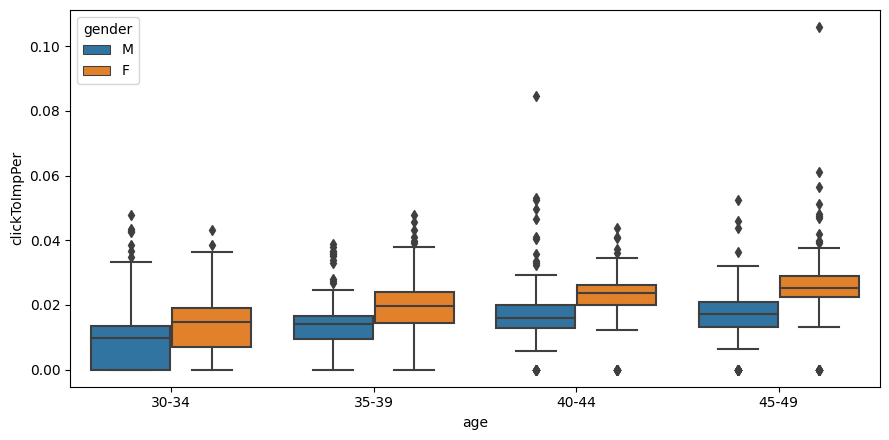

In [176]:
# Box plot for Click to Impression ratio vs Age for each gender

sns.boxplot(x = A['age'], y = A['clickToImpPer'], hue=A["gender"])
plt.show()

In [227]:
# Group the data based on age groups


D=A.groupby("age")[["interest","Impressions","Spent","Total_Conversion","Clicks"]].mean()
D['clickToImpPer']=D['Clicks']/D['Impressions']
D

,interest,Impressions,Spent,Total_Conversion,Clicks,clickToImpPer
age,,,,,,
30-34,30.821596,159608.025822,35.803756,3.359155,22.260563,0.000139
35-39,33.870968,169776.790323,44.808185,2.524194,28.604839,0.000168
40-44,34.428571,188591.938095,55.189190,2.490476,36.838095,0.000195
45-49,33.559846,246072.810811,80.118417,2.640927,53.482625,0.000217




# Conclusion:

### The target group of people with higher clickthrough rates are:

##### * Females in age group 45-49
##### * Females in age group 40-44

In [225]:
# Group the data based on age groups


D=A.groupby("age")[["interest","Impressions","Spent","Total_Conversion","Clicks"]].mean()
D['clickToImpPer']=D['Clicks']/D['Impressions']
D

,interest,Impressions,Spent,Total_Conversion,Clicks,clickToImpPer
age,,,,,,
30-34,30.821596,159608.025822,35.803756,3.359155,22.260563,0.000139
35-39,33.870968,169776.790323,44.808185,2.524194,28.604839,0.000168
40-44,34.428571,188591.938095,55.189190,2.490476,36.838095,0.000195
45-49,33.559846,246072.810811,80.118417,2.640927,53.482625,0.000217


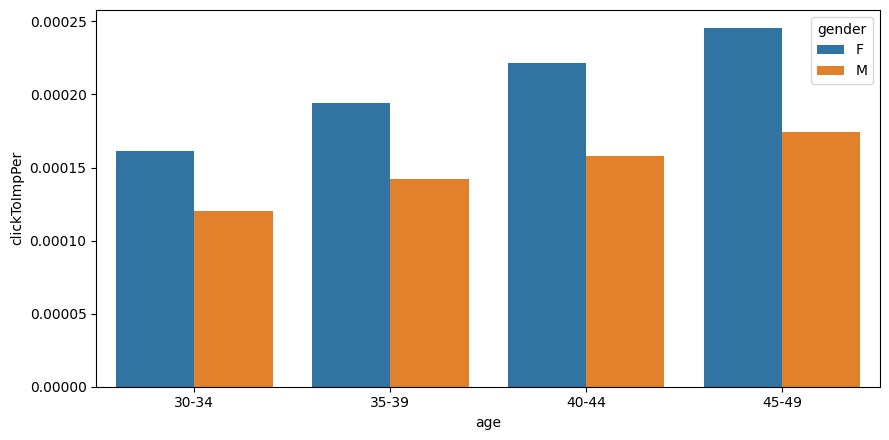

In [187]:
sns.barplot(x=B.age,y=B.clickToImpPer,hue=B.gender)
plt.show()

# Conclusion:

### The target group of people with higher clickthrough rates are:

##### Females in age group 45-49
##### Females in age group 40-44





# 3. Understanding the ideal turnaround/decision making time per age group to convert and retarget future social campaigns


In [188]:
# Group the data based on age groups
D = A.groupby(['age'],as_index=False)[['interest','Impressions','Spent','Total_Conversion','Clicks',"Approved_Conversion"]].mean()
D['clickToImpPer']=D['Clicks']/D['Impressions']
D

,age,interest,Impressions,Spent,Total_Conversion,Clicks,Approved_Conversion,clickToImpPer
0,30-34,30.821596,159608.025822,35.803756,3.359155,22.260563,1.159624,0.000139
1,35-39,33.870968,169776.790323,44.808185,2.524194,28.604839,0.834677,0.000168
2,40-44,34.428571,188591.938095,55.189190,2.490476,36.838095,0.809524,0.000195
3,45-49,33.559846,246072.810811,80.118417,2.640927,53.482625,0.803089,0.000217


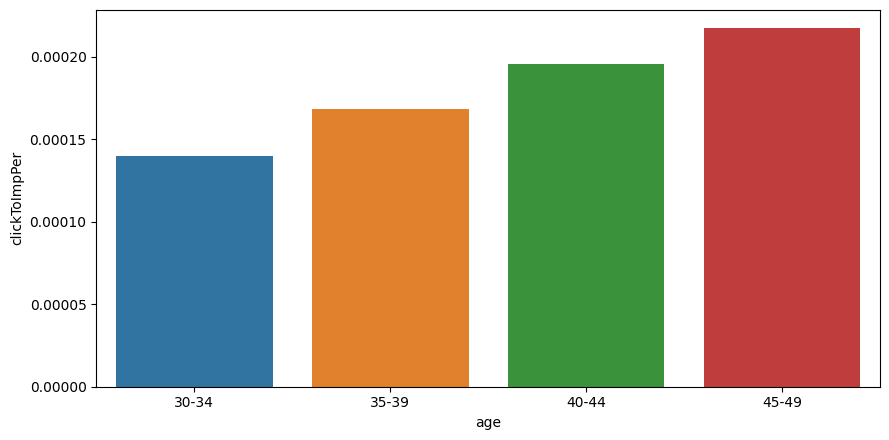

In [190]:
# Plot for Click to Impression ratio vs Age

sns.barplot(x = D['age'], y = D['clickToImpPer'])
plt.show()

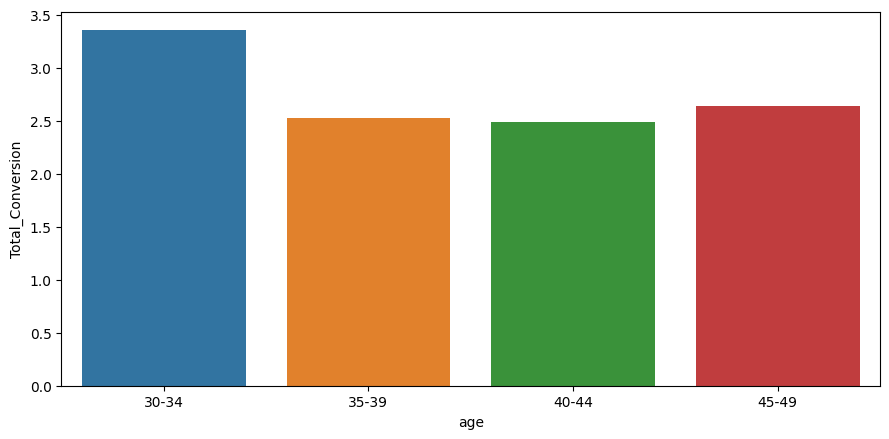

In [192]:
# Plot for Total Conversion vs Age

sns.barplot(x = D['age'], y = D['Total_Conversion'])
plt.show()

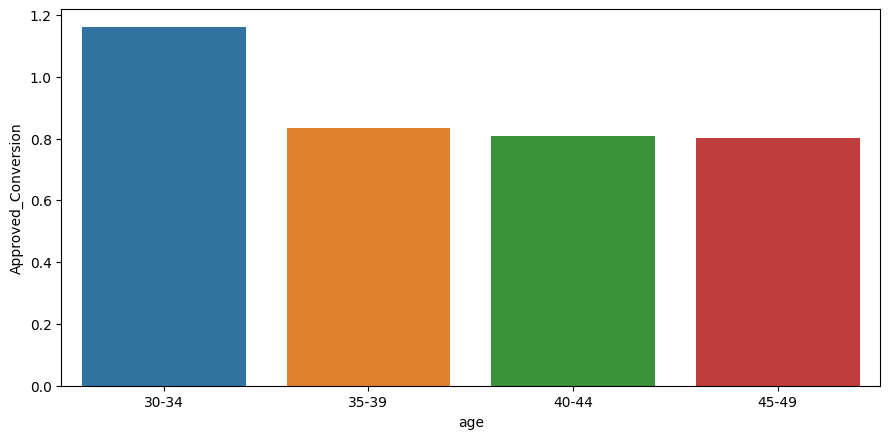

In [194]:
# Plot for Approved Conversions vs Age

sns.barplot(x = D['age'], y = D['Approved_Conversion'])
plt.show()

# Conclusion:

##### The age group of 45-49 exhibits a higher Click-to-Impression ratio, indicating that they click on ads more frequently compared to other age groups.

##### Despite having a lower Click-to-Impression ratio, individuals in the age group of 30-34 show higher total conversions, suggesting a greater interest in product inquiries compared to other age groups.

##### The age group of 30-34 demonstrates higher approved conversions, indicating a higher tendency to purchase products compared to other age groups.




# 4. Comparing the individual campaign performance so the best creative/campaign can be run again with adjusted audiences.


In [218]:
# Group the data based on xyz_campaign id

E=A.groupby(['xyz_campaign_id'],as_index=False)[['interest','Impressions','Spent','Total_Conversion','Clicks',"Approved_Conversion"]].mean()
E['clickToImpPer']=E['Clicks']/E['Impressions']
E['Total Conversions per Click']=E['Total_Conversion']/E['Clicks']
E['Click to Impression per Expenditure']=E['clickToImpPer']/E['Spent']
E

,xyz_campaign_id,interest,Impressions,Spent,Total_Conversion,Clicks,Approved_Conversion,clickToImpPer,Total Conversions per Click,Click to Impression per Expenditure
0,916,21.981481,8943.055556,2.772407,1.074074,2.092593,0.444444,0.000234,0.513274,0.000084
1,936,25.047414,17517.644397,6.235711,1.157328,4.275862,0.394397,0.000244,0.270665,0.000039
2,1178,39.428800,327717.945600,89.059440,4.270400,57.708800,1.395200,0.000176,0.073999,0.000002


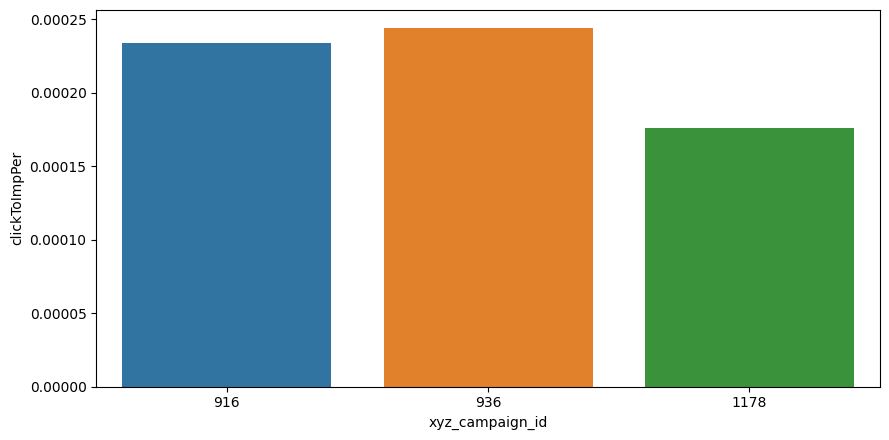

In [219]:
# Plot for CLick to Impression ratio for each company

sns.barplot(x = E['xyz_campaign_id'], y = E['clickToImpPer'])
plt.show()

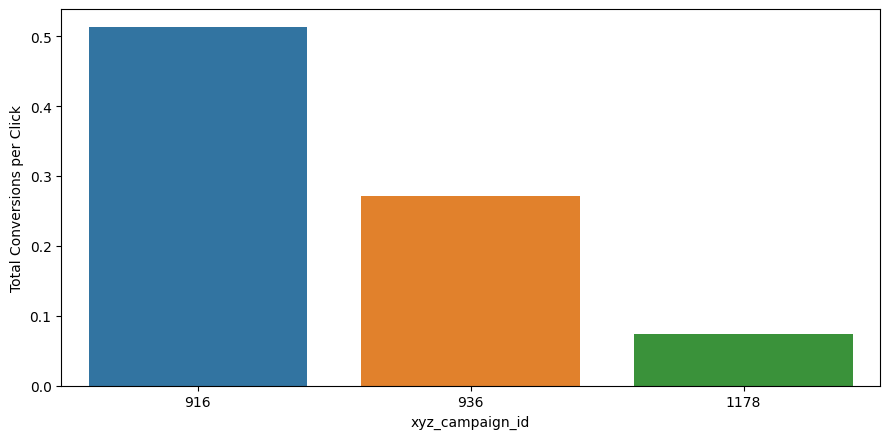

In [220]:
# Plot for Total Conversions per Click for each Company

sns.barplot(x=E['xyz_campaign_id'], y=E['Total Conversions per Click'])
plt.show()

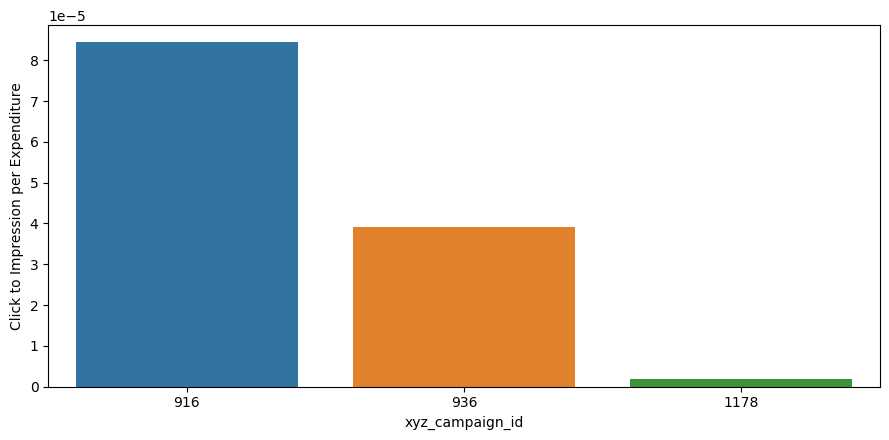

In [222]:
# Plot for Click to Impression per Expenditure for each Company

sns.barplot(x=E['xyz_campaign_id'], y=E['Click to Impression per Expenditure'])
plt.show()

# Conclusion:

### After analyzing the data, the following conclusions can be drawn:

##### Company 3 outperforms others in terms of total conversions, likely due to its significant number of data points.
##### Company 2 demonstrates a higher Clicks to Impression ratio compared to the rest.
##### Company 1 shows superior performance across multiple metrics, including Total conversions per expenditure, Click to Impression ratio per expenditure, and Total conversions per click.

#### As a result, Company 1 emerges as the leader in campaign performance among the companies examined.